# Aula 3 - Tarefas do *Data Mining*


# Recordando da última aula

## Métodos do Data Mining (usando machine learning)


#### Vamos Estudar

- **Classification <span style="background-color: #EEEEEE">supervised</span>**: Classificar um exemplar com **uma dada categoria** com base nas suas propriedades (*atributos*)

- **Regression <span style="background-color: #EEEEEE">supervised</span>**: Assignar a um exemplar **um valor** com base nas suas propriedades (*atributos*)


---

- **Clustering <span style="background-color: #EEEEEE">unsupervised</span>**: Agrupar registos ***"semelhantes"*** com base nas suas propriedades;

- **Association Rule Discovery <span style="background-color: #EEEEEE">unsupervised </span>**: Associar registos a outros, com base no histórico

---

#### Não estudamos

- <span style="background-color: #EEEEEE">**Sequential Pattern Discovery**: Determinar padrões numa sequência, por exemplo, num conjunto de dados guardados ao longo do tempo </span>

- <span style="background-color: #EEEEEE">**Deviation Detection **: Detectar quando algo sai fora da normalidade ***(não vamos estudar)***</span>



# <div style="text-align:center">Vamos Começar por perceber exactamente o que cada uma destas tarefas são com exemplos</div>

# Classification

> Classificar um exemplar com uma dada categoria com base nas suas propriedades

> **Trata-se de uma classificação Qualitativa**

### Exemplos:

- Prever casos fraudulentos em transações de cartão de crédito (Clasificação Binária)

- Reconhecer escrita manual (Classificar num conjunto de classes)
   
<img src="https://raw.githubusercontent.com/daialogue/SAD/master/images/classification_example.png" style="width:40%; margin:auto"/>  


- Prever se um cliente será perdido para um concorrente (Clasificação Binária)


## Classification (cont.)

### Alguma terminologia para dados

Nos casos anteriores, podemos explicitar como os conceitos de "features" e de "Labels" devem ser aplicadas ao nosso conjunto de dados; 

|Problema|Features/Attributes/Parameters|Class/Label/Target|
|-----|-----|----|
|**Previsao estado do Cliente**|numero de contactos/ de onde e quando liga/ status financeiro/ expiração do contrato atual|Cliente / Desistência|
|**Fraude**|Account information, Transacções recentes, Locais e Datas das transacções|Fraude / Não Fraude|
|**Escrita manual**|Pixels|algarismos de 0 a 9|

## Exemplo de Classificação mais detalhado

### Vamos analisar o caso de Classificação de Fraude/ Não Fraude

O tipo de DataSet com que vamos trabalhar será algo como:

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n=100

In [3]:
ES = np.fromiter(("Solteiro" if n >0.5 else "Casado" for n in np.random.rand(100,1)), dtype=("U8")).reshape(-1,1)
rendimentos =  (np.random.rand(100,1)*1000+500).astype(int)
cidade = np.array(["Yes" if n >0.5 else "No" for n in np.random.rand(100,1)]).reshape(-1,1)
trans =  (np.random.rand(100,1)*2000+50).astype(int)
target = np.array(["Fraud" if n >0.5 else "No Fraud" for n in np.random.rand(100,1)]).reshape(-1,1)
arr = np.concatenate((ES, rendimentos, cidade, trans, target), axis=1)
arr.shape
df = pd.DataFrame(arr, columns= ["Estado Civil", "Rendimentos Mensais", "Mesma Cidade de Habitação", "Valor da Transacção", "Classe/Label"])

(100, 5)

In [4]:
df.head()

,Estado Civil,Rendimentos Mensais,Mesma Cidade de Habitação,Valor da Transacção,Classe/Label
0,Casado,872,No,868,Fraud
1,Solteiro,680,Yes,446,No Fraud
2,Solteiro,804,No,1298,Fraud
3,Casado,1326,Yes,1224,Fraud
4,Solteiro,913,Yes,891,No Fraud


## Comentários

- Repare-se no tipo de dados (categorical, continuous, Boolean)
- Repare-se no tipo de classificação necessária: binária


### O que se pretende

Obter um **modelo** que estime qual a classificação de novos exemplares, por exemplo:

In [5]:
data = np.array(["Casado", 750, "Yes", 1500, "?"]).reshape(1,-1)
df = pd.DataFrame(data, columns= ["Estado Civil", "Rendimentos Mensais", "Mesma Cidade de Habitação", "Valor da Transacção", "Classe/Label"])

In [6]:
df

,Estado Civil,Rendimentos Mensais,Mesma Cidade de Habitação,Valor da Transacção,Classe/Label
0,Casado,750,Yes,1500,?


### Vamos usar Algoritmos para aprendermos a classificar estes novos registos

# Regression

>Assignar a um exemplar um valor com base nas suas propriedades

>**Trata-se de uma classificação Quantitiativa**

### Exemplos:

- Previsão de números de vendas de um novo produto com base em despesa/tipo(s)/duração das campanhas publicitárias

- Previsão de séries temporais de índices de mercado de ações com base em notícias e outros eventos

#### Vamos ver como funciona um modelo de regressão neste último caso:

Vamos estimar as cotações da bolsa da Galp para o fim da semana: vamos saber qual a variação da cotação do início para o fim da semana e chamemos a este resultado **Weekly_Delta**

Imagine-se que temos na nossa posse as seguintes **features** relacionados com notícias:

- Relevância para a Galp - valor de 0 a 20 (onde menor que 10 faz descer a cotação)
- Broadcast (0 a 20 consoante a credibilidade do meio de comunicação onde apareceu)

Temos então uma tabela de informação do estilo:

In [9]:
relev = np.random.rand(n,1)*20
broadcast = np.random.rand(n,1)*20

In [10]:
datanp = np.concatenate((relev, 
                         broadcast, 
                         (((relev-10)**3+np.random.rand(n,1)-0.5)*.005)+((broadcast-10)*5+np.random.rand(n,1)-0.5)*0.02), axis=1)

print(datanp.shape)
my_data = pd.DataFrame(datanp, columns= ["Broadcast","Relevance", "Weekly_Delta (Target)"])

(100, 3)


In [21]:
my_data.head()

,Broadcast,Relevance,Weekly_Delta (Target)
0,13.998168,7.072976,0.035089
1,5.251529,12.648720,-0.260360
2,17.074213,19.282552,2.694839
3,17.848087,11.879574,2.609564
4,17.177002,7.025352,1.548740


Se pegarmos na feature Broadcast e traçarmos um gráfico Relevance vs Weekly_Delta (Target Value) obtemos:

[0, 20, -5, 5]

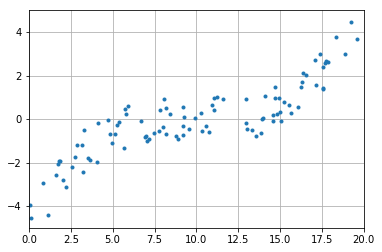

In [14]:
plt.plot(my_data["Broadcast"], my_data["Weekly_Delta (Target)"], ".")
plt.grid()
plt.axis([0, 20, -5, 5])
plt.show()

Mas se pegarmos na feature Relevância e traçarmos um gráfico Relevance vs Weekly_Delta (Target Value) obtemos:

[0, 20, -10, 10]

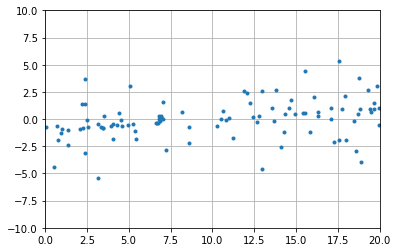

In [16]:
plt.plot(my_data["Relevance"], my_data["Weekly_Delta (Target)"], ".")
plt.grid()
plt.axis([0, 20, -10, 10])
plt.show()

Vendo estes dados em "3D", como podemos prever o comportamento destas acções?

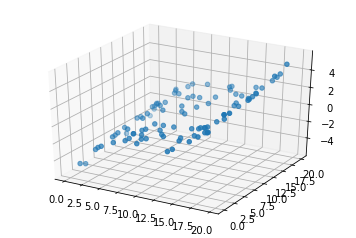

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(my_data["Broadcast"], my_data["Relevance"],my_data["Weekly_Delta (Target)"])
plt.show()

Podemos concluir várias coisas:

- A relação do valor esperado com o a *feature* Relevance é **linear** (apesar do aparente ruído - **será ruído**?)

- Assim, um modelo que descreve correctamente o **Valor da ação vs Relevance** (caso não houvesse mais dados) poderia ser um modelo linear - **regressão linear** do tipo 

$$Y = a+BX[Relevance]$$ 

onde X poderiam ser features concatenadas na mesma matriz verticalmente

---

- A relação do valor esperado com o a *feature* Broadcast é **não linear**

- Assim, um modelo que descreve correctamente o **Valor da ação vs Broadcast** (caso todos os dados tivessem esta relação) poderia ser um modelo linear - **regressão não-linear** do tipo 

$$Y = f(X[Broadcast])$$

onde de novo X poderiam ser features concatenadas na mesma matriz verticalmente;


## Regression (cont.)
---
### Alguns comentários adicionais

Podemos ter também como atributos o valor da própria ação e de outras, que poderão influenciar a cotação da Galp;

- Cotação actual Galp
- Variação da Cotação da galp na útlima semana (subiu ou desceu quanto)
- Variação da Cotação na última semana do petróleo;
- Variação da Cotação na última semana da BP, Shell, etc.

---

Se repararem, existem vários problemas de classificação/regressão que devem ser aplicadados antes resolvermos este:
Quais são?

## Regression (cont.)
---
### Alguns comentários adicionais (cont.)

##### são eles:

- Regressão para "classificar" na escala de 0 a 20 a "Relevância" de cada notícia.
- Regressão para "classificar" na escala de 0 a 20 a "Broadcast" de cada notícia.

Como deveria isto ser feito? Quais seriam as "features"? Qual seria o "target" value?

# Clustering 
---

> Agrupar exemplares com base nas suas propriedades. 

> É um processo de aprendizagem **não supervisionado**.

Exemplos:

- Encontrar grupos de documentos que são semelhantes entre si com base em termos relevantes que neles aparecem;
- Subdividir um mercado em subconjuntos de clientes, onde cada subconjunto pode ser trabalhado de forma específica;

## Clustering (cont.)
---
#### Comentários 
##### Tomemos o exemplo do clustering de documentos semelhantes

- Repare-se que não existem, à partida, Classes - estas serão criadas com base nas combinações de "features" que vão surgindo nos documentos.<img src="./images/Cluster_data.png" style="width:40%; margin:auto"/> 
Por exemplo, neste caso nada nos diz à partida que categorias existem - são criadas de acordo com o tipo de documentos que foram analisados

- Os grupos são criados medindo quantivamente a semelhança entre registos e denotando a que grupo cada um deve pertencer.




## Association Rule Discovery
---
Dado um conjunto de registros, cada um dos quais contém alguns items de uma determinada coleção, "Desccobrir" regras de dependência que prevejam a ocorrência de um item com base em ocorrências de outros itens - **é uma aprendizagem não supervisionada**

### Exemplos:

- **Marketing and sales promotion** - regras de associação permitem, por exemplo:
    - Perceber que quais os produtos cuja venda faz disparar as vendas de um produto "Pão" $$[Prods] => Pão$$
    - Perceber que produtos são mais afectados pela falta de venda de pão $$[Pão] => Prods$$    
    

## Association Rule Discovery
---

- **Gestão do posicionamento de prateleiras num Supermacado** - Ninguem se surpreende em encontrar molhos ketchup junto das batatas fritas;

<img src="https://raw.githubusercontent.com/daialogue/SAD/master/images/supermarket.jpg" style="width:40%; margin:auto"/>

- **Gestão do posicionamento de produtos numa Webpage** (Pelo mesmo motivo que o anterior)

- **Gestão de inventário** - Se a demanda de produtos está correlacionada, então 
    - a sua encomenda a fornecedores também pode ser prevista em conjunto
    - No caso de serviços de reparação, as peças a levar na carrinha pelo técnico podem igualmente ser previstas desta forma. O mesmo se pode dizer de ferramentas;

<img src="https://raw.githubusercontent.com/daialogue/SAD/master/images/car_with_tools.jpg" style="width:40%; margin:auto"/>

## Exemplo de Marketing e Promoção

In [17]:
import pandas as pd
A = [{"T1": {"Blouse"}}, {"T11": {"Shirt"}}, {"T2": {"Shoes", "Skirt", "Shirt"}}, {"T12": {"Blouse", "Jeans", "Shoes", "Skirt", "Shirt"}}, {"T3": {"Jeans", "Shirt"}}, {"T13": {"Jeans", "Shoes", "Shorts", "Shirt"}}, {"T4": {"Jeans", "Shoes", "Shirt"}}, {"T14": {"Shoes", "Skirt", "Shirt"}}, {"T5": {"Jeans", "Shorts"}}, {"T15": {"Jeans", "Shirt"}}, {"T6": {"Shoes", "Shirt"}}, {"T16": {"Skirt", "Shirt"}}, {"T7": {"Jeans", "Skirt"}}, {"T17": {"Blouse", "Jeans", "Skirt"}}, {"T8": {"Jeans", "Shoes", "Shorts", "Shirt"}}, {"T18": {"Jeans", "Shoes", "Shorts", "Shirt"}}, {"T9": {"Jeans"}}, {"T19": {"Jeans"}}, {"T10": {"Jeans", "Shoes", "Shirt"}}, {"T20": {"Jeans", "Shoes", "Shorts", "Shirt"}}] 
Trans = [int(list(a.keys())[0][1:]) for a in A]
Prods = [list(a.values())[0] for a in A]
B = pd.DataFrame([Trans, Prods], ["Transação", "Produtos"]).T
B.sort_values("Transação")

,Transação,Produtos
0,1,{Blouse}
2,2,"{Shoes, Skirt, Shirt}"
4,3,"{Jeans, Shirt}"
6,4,"{Shoes, Jeans, Shirt}"
8,5,"{Jeans, Shorts}"
10,6,"{Shoes, Shirt}"
12,7,"{Jeans, Skirt}"
14,8,"{Shoes, Jeans, Shorts, Shirt}"
16,9,{Jeans}
18,10,"{Shoes, Jeans, Shirt}"


### Fazendo uma análise rápida, podemos verificar que:

- **Quem compra `Shorts` normalmente também compra outras coisas** - Isto permite fazer uma campanha para `Shorts`, na compra de outros artigos, de modo a "puxar a compra de outras coisas;

- **Quando alguem compra `{Shirt, Shoes, Jeans}` leva *sempre* `Shorts`**  - Para que servirá??


O próximo passo é aprendermos algumas ferrametas para mexer com dados